## Finance Stock Project Using Panda, Seaborn
### Exploratory Data Analysis of stock prices

In [1]:
# Import relevant packages
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

## Data

stock information are provided for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
df =pd.read_pickle('all_banks')

In [3]:
# Take a brief look through the stcok dataset
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [4]:
# list of all the stock tickers we are instearested
tickers = list(df.melt()['Bank Ticker'].unique())
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Set the column name levels (this is filled out for you):**

## EDA


In [5]:
# Highest close price for each stock
df.xs('Close', axis=1,level=1).max()  


Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Using the formula below finding returns for each stock on a 30-days basis
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [6]:
returns = pd.DataFrame()

In [7]:
for tick in tickers:
    nam = tick + ' Return'
    returns[nam] = df[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

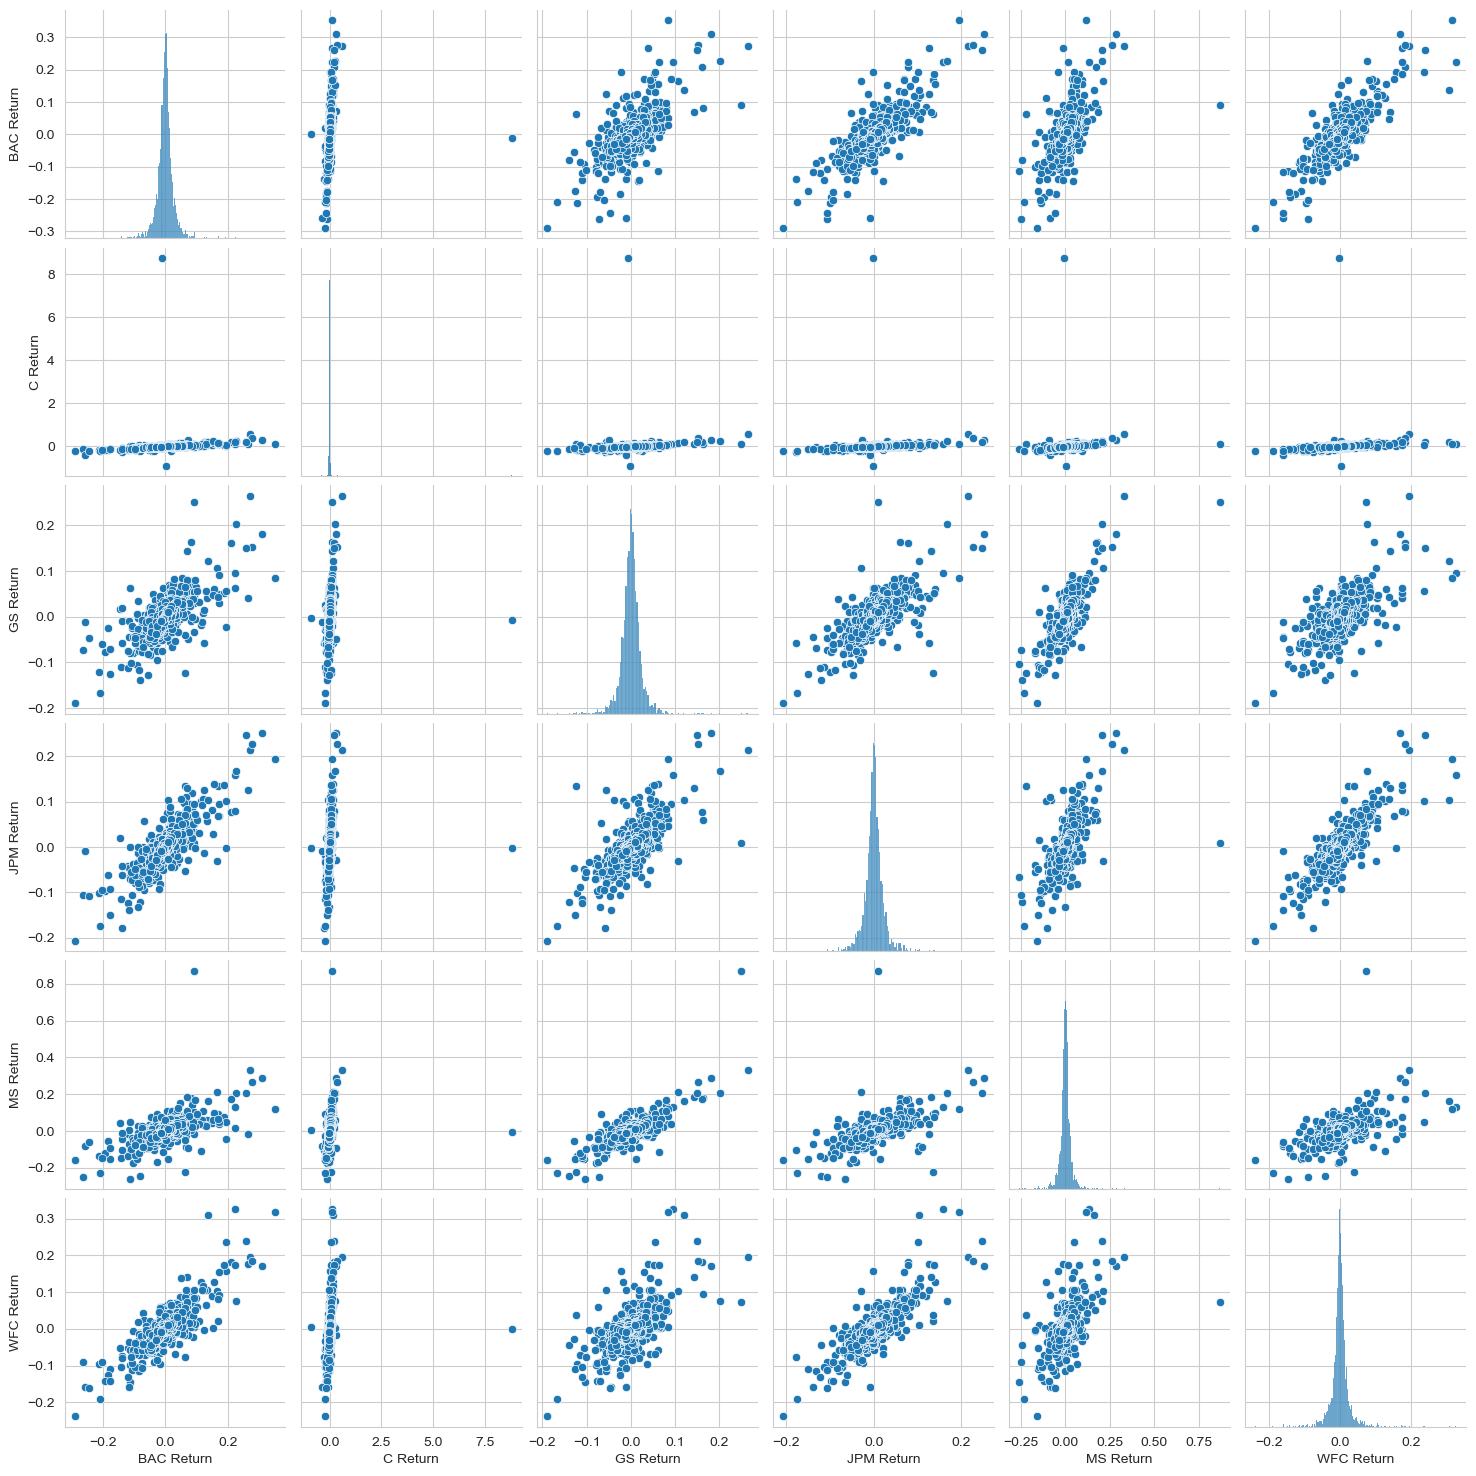

In [8]:
sns.pairplot(returns)

In [9]:
# lowest return date
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [10]:
# highest return dates
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [11]:
# Look at th resk of investing in each stock by using standard deviation of returns
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [17]:
df_close = df.xs('Close', axis=1, level=1)

<AxesSubplot:xlabel='Date'>

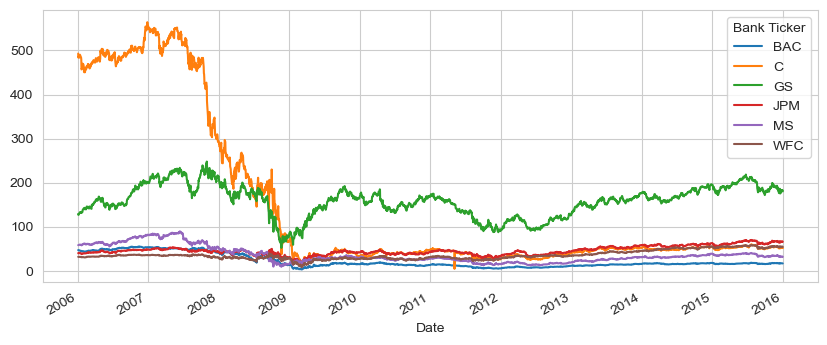

In [177]:
df_close.plot(figsize=(10,4), leg)

## Moving Averages

In [13]:
df_bac = df.xs(('BAC'), axis=1, level=0)
df_bac.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


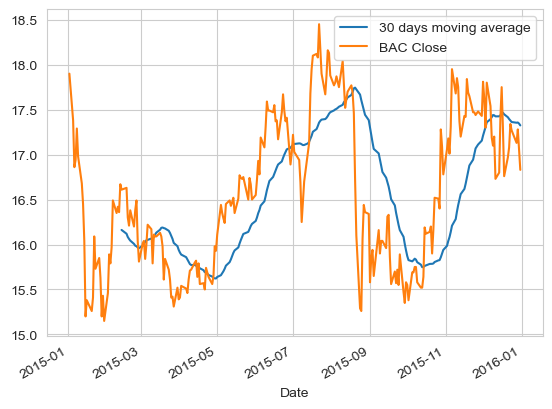

In [15]:
# 30 days Moving average during 2015
df_bac['Close'].loc['2015-01-01':'2015-12-31'].rolling(window=30).mean().plot(label='30 days moving average')
df_bac['Close'].loc['2015-01-01':'2015-12-31'].plot(label='BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

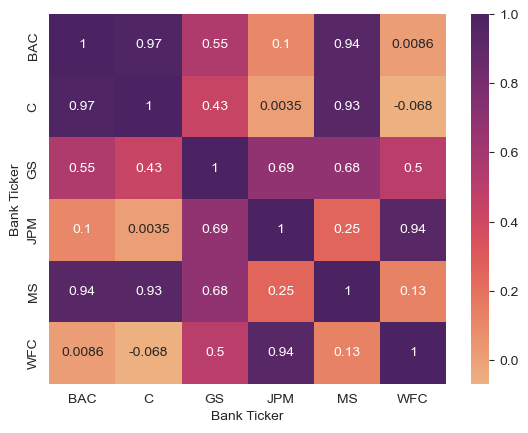

In [19]:
# Heatmap stating correaltion between each stock
colormap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(df_close.corr(), annot=True, cmap=colormap)

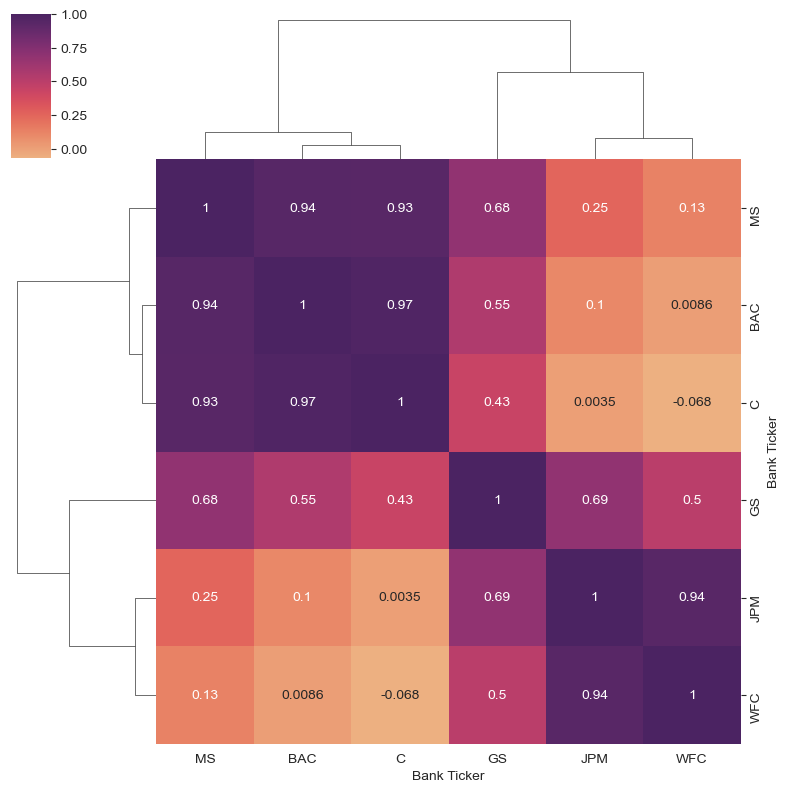

In [25]:
sns.clustermap(df_close.corr(), figsize=(8,8),annot=True, cmap=colormap)

Other Visualization tool useful for stock analysis

In [26]:
# Create Bac stock candle graph for 2015 using iplot
df_bac[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [27]:
df.xs(('MS'), axis=1, level=0)['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')

In [28]:
df.xs(('BAC'), axis=1, level=0)['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')